# **DOWNLOAD FILE**

In [1]:
!gdown --id 1WEiWPmtvwXDYDofKzJzg75SH22UCqqOb             #lakukan download file yang akan diuji

Downloading...
From: https://drive.google.com/uc?id=1WEiWPmtvwXDYDofKzJzg75SH22UCqqOb
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 56.0MB/s]


# **IMPORT LIBRARY**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
import copy
import math
from sklearn.metrics import silhouette_score

# **EXPLORASI DATA**

In [3]:
#read data
df = pd.read_csv('kendaraan_train.csv')
df.head(10)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
6,7,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0,1
7,8,Pria,23.0,NaN,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
9,10,NaN,54.0,1.0,29.0,0.0,> 2 Tahun,Pernah,88883.0,124.0,28.0,1


In [4]:
#drop feature NaN
df.replace([np.nan])
df.dropna(inplace=True)
df.head(10)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
10,11,Pria,25.0,1.0,14.0,1.0,< 1 Tahun,Tidak,34212.0,152.0,282.0,0
14,15,Pria,66.0,1.0,24.0,1.0,1-2 Tahun,Tidak,38616.0,145.0,281.0,0
15,16,Pria,31.0,1.0,8.0,0.0,< 1 Tahun,Pernah,2630.0,152.0,132.0,0
16,17,Wanita,24.0,1.0,30.0,1.0,< 1 Tahun,Tidak,27285.0,152.0,215.0,0
17,18,Wanita,22.0,1.0,15.0,0.0,< 1 Tahun,Pernah,38289.0,152.0,225.0,0


In [5]:
#replace
df.replace(['< 1 Tahun', '1-2 Tahun', '> 2 Tahun'], [0,1,2], inplace=True)

df.replace(['Wanita', 'Pria'], [0,1], inplace= True)
df.replace(['Tidak', 'Pernah'], [0,1], inplace=True)

df.head(10)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0
1,2,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
3,4,0,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0
5,6,1,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0,0
8,9,0,20.0,1.0,8.0,1.0,0,0,30786.0,160.0,31.0,0
10,11,1,25.0,1.0,14.0,1.0,0,0,34212.0,152.0,282.0,0
14,15,1,66.0,1.0,24.0,1.0,1,0,38616.0,145.0,281.0,0
15,16,1,31.0,1.0,8.0,0.0,0,1,2630.0,152.0,132.0,0
16,17,0,24.0,1.0,30.0,1.0,0,0,27285.0,152.0,215.0,0
17,18,0,22.0,1.0,15.0,0.0,0,1,38289.0,152.0,225.0,0


In [7]:
df.isna().sum() 

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [8]:
x_train = df.dropna()                     #cek apakah masih ada data kosong/NaN
x_train.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [9]:
#scalling dengan standard scaler
testt = pd.DataFrame(StandardScaler().fit_transform(x_train))

In [10]:
#feature selection dengan PCA
pca_train = PCA(n_components=2)
principalComponents_train = pca_train.fit_transform(testt)

In [24]:
data1 = pd.DataFrame(data = principalComponents_train,
                    columns = ['Principal Components 1', 'Principal Components 2'])
data1.head()

,Principal Components 1,Principal Components 2
0,-2.148120,0.176507
1,2.863845,0.818241
2,0.477919,0.448773
3,-2.136602,0.117296
4,-2.550463,-0.195846


# **MODELING K-MEANS**

In [25]:
#menghitung jarak dari centroid dengan euclidean
def euclidean_dist(x, y):
    return math.sqrt(sum((x - y)**2))

In [26]:
#untuk pemberhentian iterasi jika posisi centroid sudah stabil/tidak berubah
def is_convergent(temp_centroid, centroid, k):
    for i in range(k):
        if (temp_centroid.get(i) != centroid.get(i))[0]:
            return False

    return True

In [27]:
#membuat fungsi untuk centroid dan cluster dengan k-means
def kmeans(k, max_iter, df):
  total = 0
  centroid = {i: df[random.randint(0, len(df))] for i in range(k)}                #inisiasi dictionary centroid untuk memilih centroid secara random
    
  temp_centroid = centroid.copy()                                                 #sebagai patokan iterasi 
    
  for _ in range(max_iter):
        cluster = {i: [] for i in range(k)}                                       #mendefinisikan dictionary cluster
        sse = []
        for x in df:                                                              #mencari nilai data terdekat dari centro
            jarak = [euclidean_dist(x, centroid[c]) for c in centroid]
            sse.append(np.min(jarak))
            cluster[jarak.index(min(jarak))].append(x)
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)
        if is_convergent(temp_centroid, centroid, k): 
          break

        temp_centroid = centroid.copy()

    # Mengembalikan Nilai Dari Variabel Centroid Dan Cluster
  return centroid, cluster, sum(sse)

In [28]:
#membuat array cluster yang akan diinputkan ke k-means
def buat_cluster(cluster):
  df = []
  for key in cluster[1].keys():
        for c in cluster[1].get(key):
            df.append((c[0], c[1], key))

    # Set Array df menjadi dataframe, Menamakan nama kolom dan menampilkannya
  df = pd.DataFrame(df)
  df.columns = ['Principal Components 1', 'Principal Components 2', 'Cluster']
    
  return df

In [29]:
#Inisialisasi array Untuk SSE dan semua hasil cluster
sse_all = []
cluster_all = [] 

data = data1.to_numpy()                           #merubah dataframe menjadi np array
max_iter = 100                                      #inisiasi nilai maks_iter dan K
K = range(2, 6)

for i in K: 
    centroid, cluster, sse = kmeans(i, max_iter, data)
    print(f'Centroid Cluster-{i}: \n{centroid}\n')
    sse_all.append(sse)                             #input setiap nilai yang di return ke array
    cluster_all.append([i, cluster, centroid])

Centroid Cluster-2: 
{0: array([1.46541861, 0.17880596]), 1: array([-1.53372276, -0.18714023])}

Centroid Cluster-3: 
{0: array([ 1.75630194, -0.45925878]), 1: array([0.19125579, 1.70323109]), 2: array([-1.69100973, -0.34653531])}

Centroid Cluster-4: 
{0: array([0.20219448, 1.70983911]), 1: array([ 0.12584178, -1.61429506]), 2: array([-2.04535869,  0.06230948]), 3: array([ 2.0442062 , -0.11575427])}

Centroid Cluster-5: 
{0: array([0.16014628, 1.69074807]), 1: array([-0.33345255, -1.80472244]), 2: array([2.37304671, 0.33302188]), 3: array([ 1.36747368, -0.90567598]), 4: array([-2.04828185,  0.05963271])}



In [30]:
def visualize_cluster(cluster_all):
    clusterize = []                                                               #buat array untuk menyimpan hasil klusterisasi 
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))                               #membuat subplot untuk scatterplot chart dan inisiasi awal baris dan kolom
    row = 0
    col = 0
   
    for cluster in cluster_all: 
        df = buat_cluster(cluster)                                                #buat dataframe tiap cluster dan masukkan jenis cluster untuk hitung score
        clusterize.append(df)
        colors = ['r', 'g', 'b', 'y', 'orange']
        #title plot
        axs[col, row].set_title(f'Model Dengan {cluster[0]} Cluster', fontsize=14)
        #loop tiap titik data dan centroid
        for i in range(cluster[0]):
            axs[col][row].scatter(
                df['Principal Components 1'][df['Cluster'] == i],
                df['Principal Components 2'][df['Cluster'] == i],
                color=colors[i],
                label=f'Cluster {i}'
            )
            axs[col][row].scatter(cluster[2][i][0], cluster[2][i][1], color='k', marker='P')

        #untuk acuan tampilan legend centroid
        axs[col][row].scatter(cluster[2][0][0], cluster[2][0][1], color='k', label="Centroids", marker='P')                  
        #set label x, y dan tempat legend ditampilkan
        axs[col][row].legend(loc='best', bbox_to_anchor=(1, 0.5))
        #atur row dan kolom plot yang akan ditampilkan 
        row += 1
        if row == 2: row = 0
        if row == 0 and col == 0: 
            row = 0
            col = 1 
    #set label x dan y 
    for ax in axs.flat:
        ax.set(xlabel='Principal Components 1', ylabel='Principal Components 2')
        ax.label_outer()
    #tampilkan plot
    plt.subplots_adjust(wspace=0.3, hspace=0.1)
    plt.show()

    return clusterize

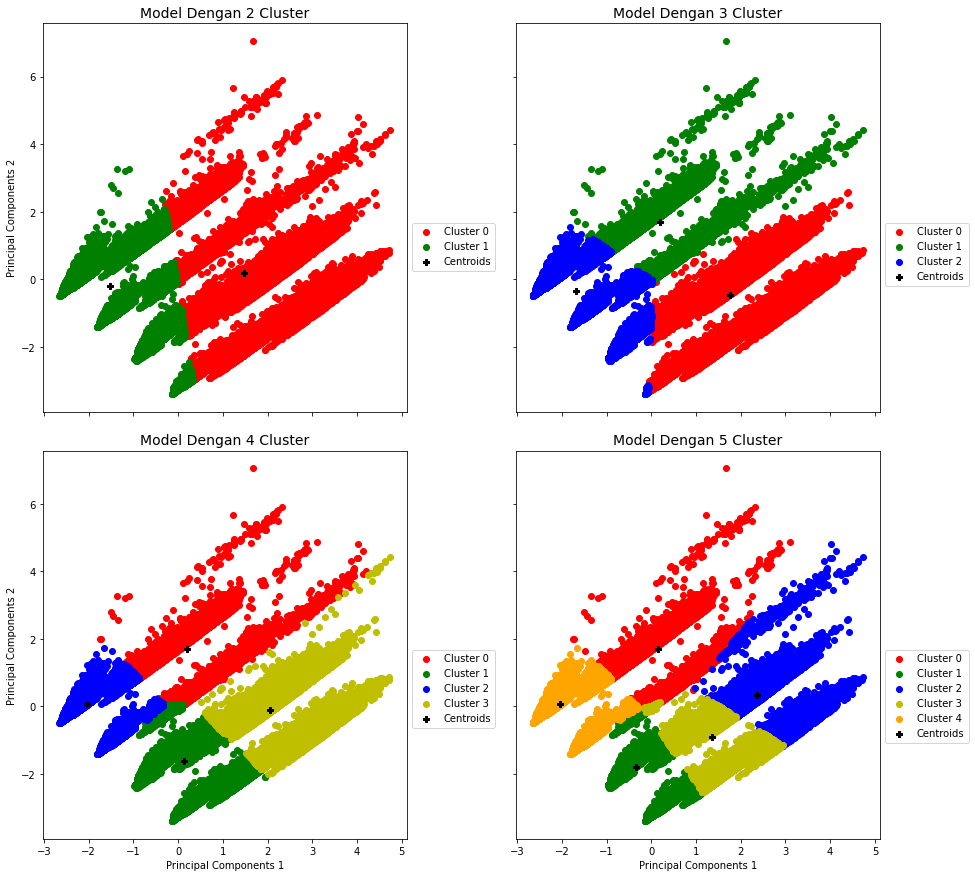

In [31]:
clusterize = visualize_cluster(cluster_all)

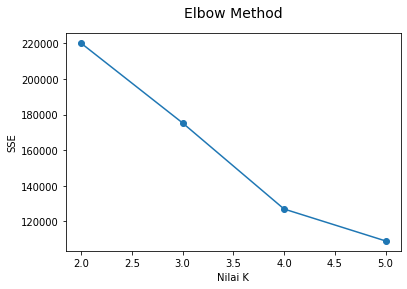

In [32]:
# Plot data
plt.plot(K, sse_all, marker='o')
plt.xlabel('Nilai K')
plt.ylabel('SSE')
plt.title('Elbow Method', fontsize=14, pad=16)
plt.show()

In [33]:
from sklearn.metrics import silhouette_score

for i, cluster in enumerate(clusterize):
    score = silhouette_score(cluster[['Principal Components 1', 'Principal Components 2']], cluster['Cluster'])
    print(f'Cluster-{i+2}, Silhouette Score = {score}')

Cluster-2, Silhouette Score = 0.4809231736506345
Cluster-3, Silhouette Score = 0.5108670159838642
Cluster-4, Silhouette Score = 0.5563159244575188
Cluster-5, Silhouette Score = 0.5404176249854816
